## All the Libraries used in this project of Classification of Spam and Ham are been imported:

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  
from sklearn.metrics import plot_confusion_matrix,classification_report,plot_precision_recall_curve,plot_roc_curve

In [2]:
dataset=pd.read_csv("spam dataset.csv")

In [3]:
dataset.shape

(4601, 58)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   make        4601 non-null   float64
 1   address     4601 non-null   float64
 2   all         4601 non-null   float64
 3   3d          4601 non-null   float64
 4   our         4601 non-null   float64
 5   over        4601 non-null   float64
 6   remove      4601 non-null   float64
 7   internet    4601 non-null   float64
 8   order       4601 non-null   float64
 9   mail        4601 non-null   float64
 10  receive     4601 non-null   float64
 11  will        4601 non-null   float64
 12  people      4601 non-null   float64
 13  report      4601 non-null   float64
 14  addresses   4601 non-null   float64
 15  free        4601 non-null   float64
 16  business    4601 non-null   float64
 17  email       4601 non-null   float64
 18  you         4601 non-null   float64
 19  credit      4601 non-null  

In [5]:
dataset.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,spam


In [6]:
dataset.isnull()

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4599,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
dataset.columns

Index(['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you', 'credit', 'your', 'font', '0',
       'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857',
       'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct',
       'cs', 'meeting', 'original', 'project', 're', 'edu', 'table',
       'conference', 'semicol', 'paren', 'bracket', 'bang', 'dollar', 'pound',
       'cap_avg', 'cap_long', 'cap_total', 'Class'],
      dtype='object')

In [8]:
def report(model):
    preds = model.predict(X_test)
    plot_confusion_matrix(model,X_test,y_test)
    plot_precision_recall_curve(model,X_test,y_test)
    plot_roc_curve(model,X_test,y_test)
    print(classification_report(preds,y_test))


In [9]:
feature_cols = ['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you', 'credit', 'your', 'font', '0',
       'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857',
       'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct',
       'cs', 'meeting', 'original', 'project', 're', 'edu', 'table',
       'conference', 'semicol', 'paren', 'bracket', 'bang', 'dollar', 'pound',
       'cap_avg', 'cap_long', 'cap_total']
X = dataset[feature_cols] # All the Feature columns are included in this X
y = dataset.Class # All the Target/Decision values which are in the Class are included in this Y

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=3601, random_state=42)
#As per question, we have to take 1000 labels for the training set and rest 3601 as the testing set, so splitting them accordingly

In [11]:
X_train.shape

(1000, 57)

In [12]:
X_test.shape

(3601, 57)

In [13]:
clf = DecisionTreeClassifier(criterion="entropy")

In [14]:
clf = clf.fit(X_train,y_train)

In [15]:
y_pred = clf.predict(X_test)

In [16]:
metrics.accuracy_score(y_test, y_pred)

0.8972507636767565

<Figure size 3000x3500 with 0 Axes>

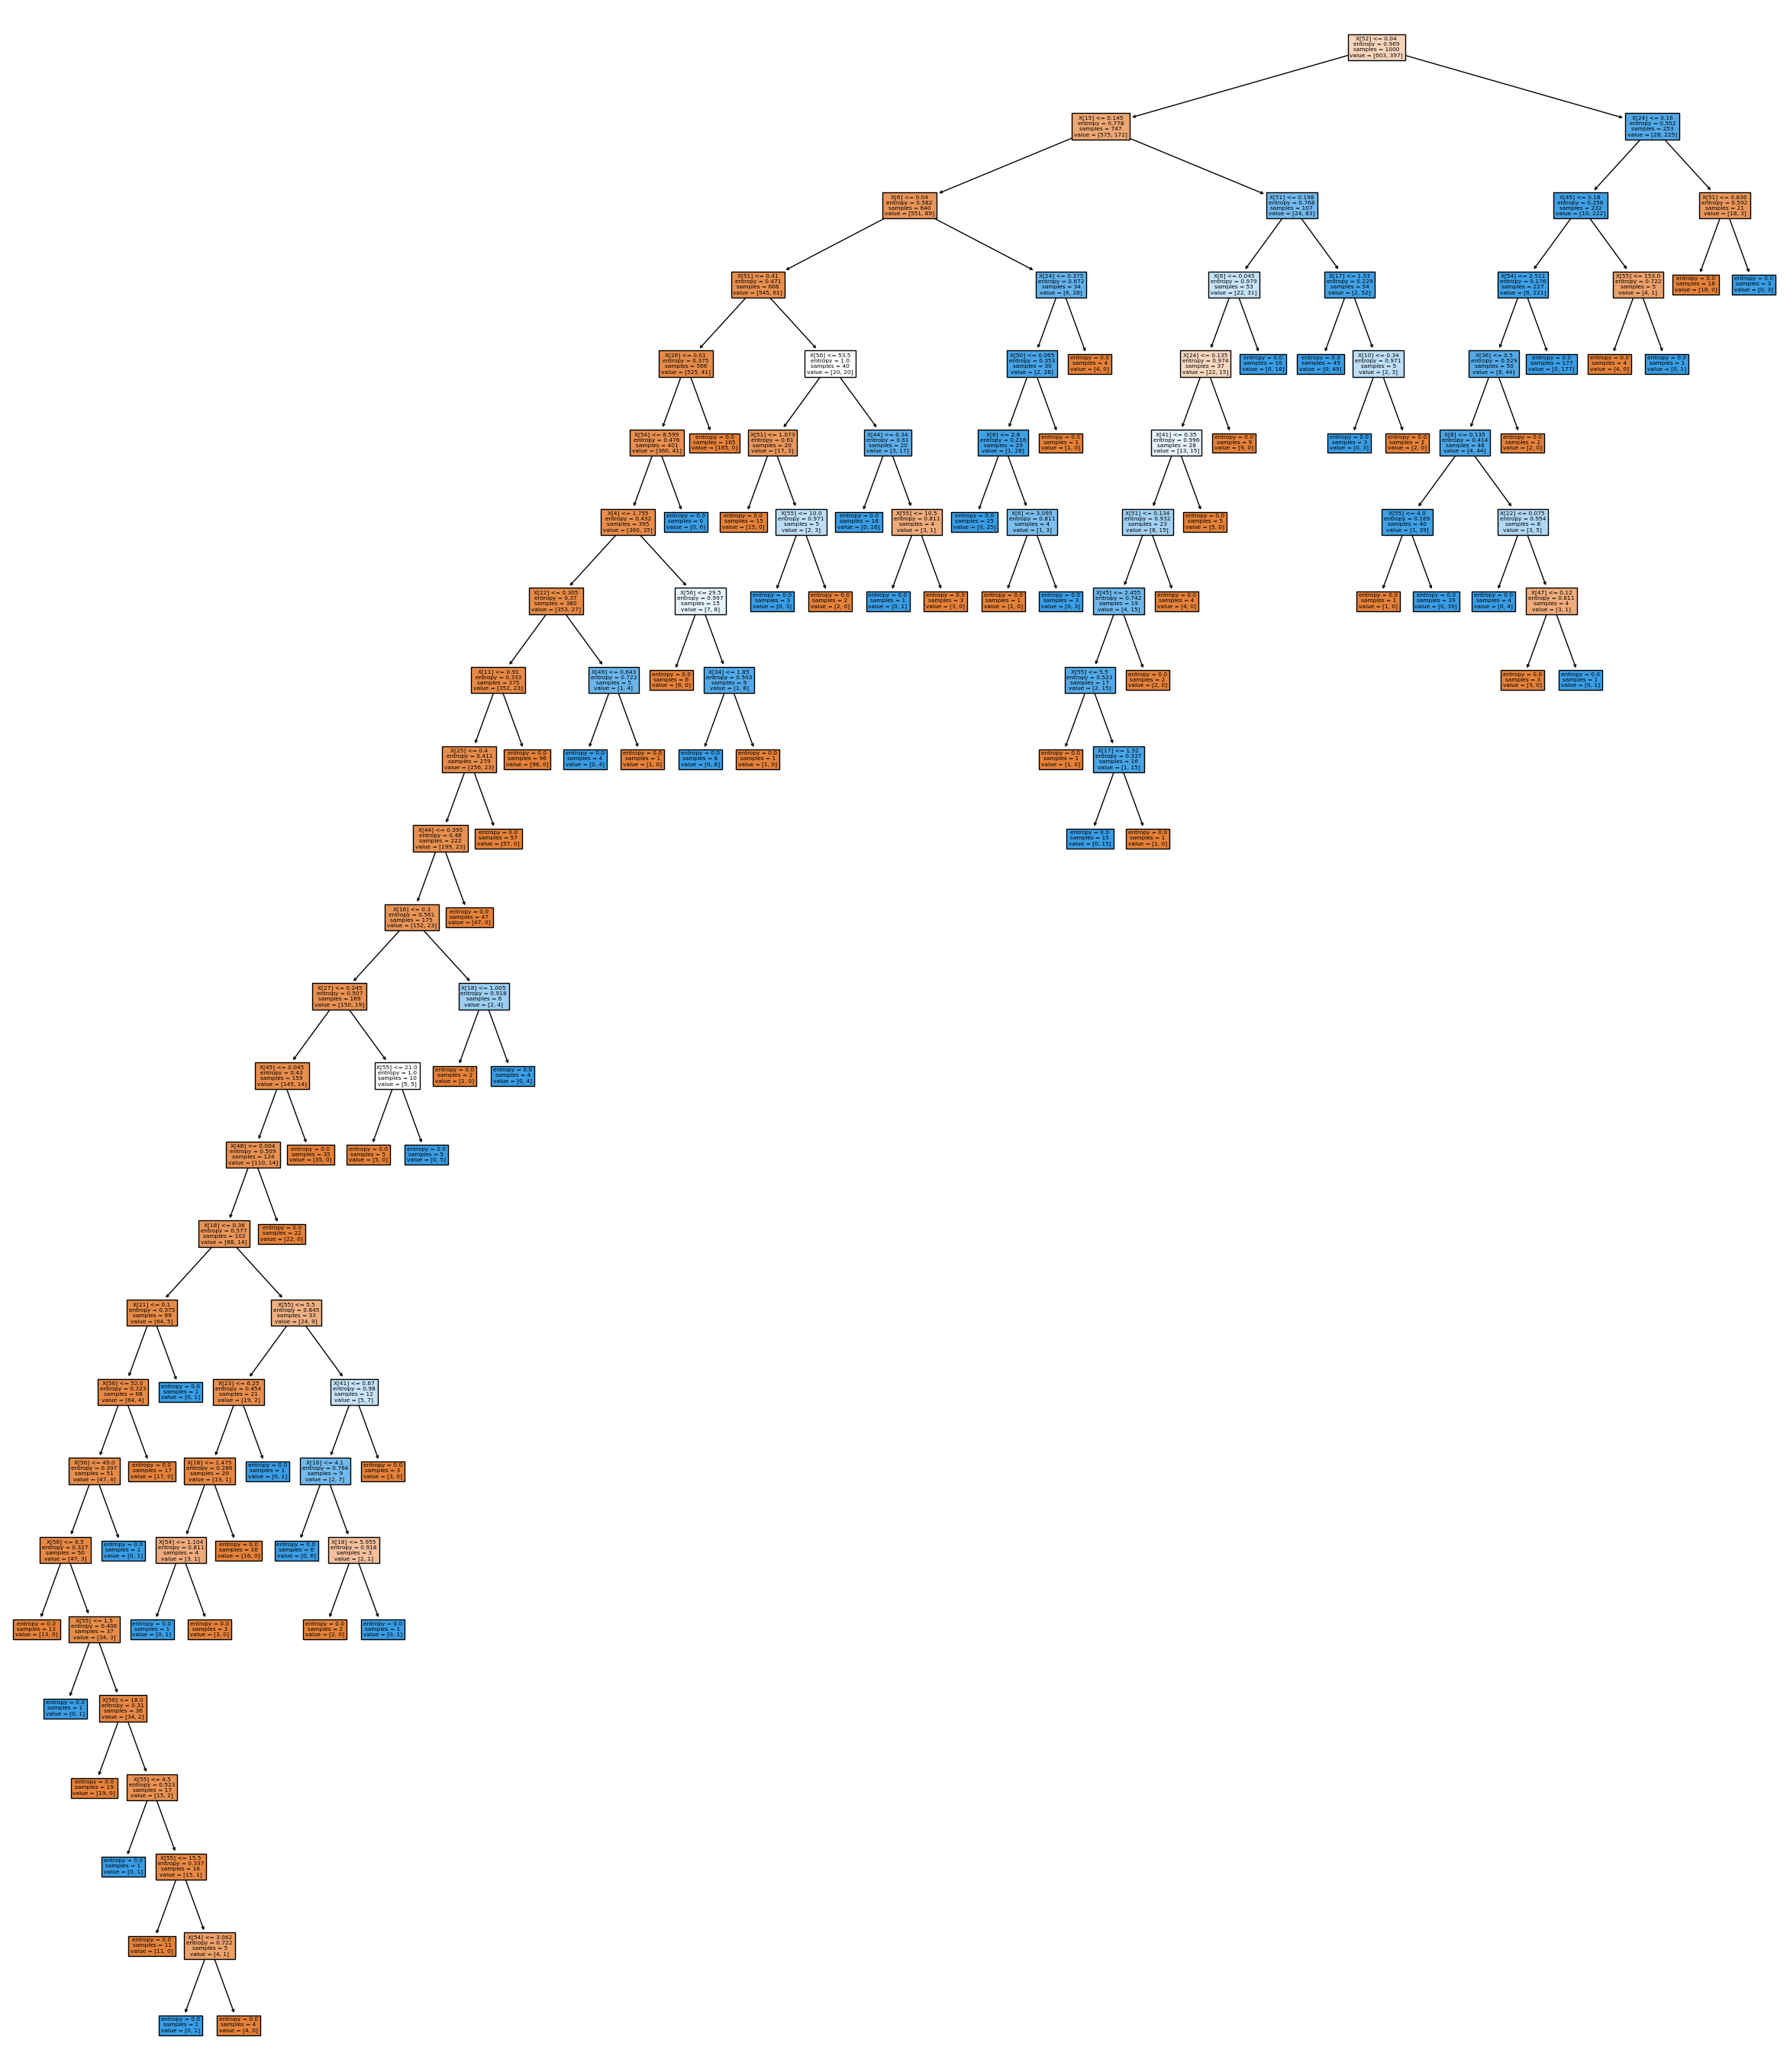

In [35]:
clf = clf
fig = plt.figure(figsize=(30,35))
fig = plt.figure(figsize=(30,35))
plot = tree.plot_tree(clf, filled=True)

REPORT FOR DECISION TREE CLASSIFIER MODEL

C:\pythonmainfiledownload\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\pythonmainfiledownload\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\pythonmainfiledownload\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class m

              precision    recall  f1-score   support

         ham       0.89      0.93      0.91      2089
        spam       0.90      0.85      0.87      1512

    accuracy                           0.90      3601
   macro avg       0.90      0.89      0.89      3601
weighted avg       0.90      0.90      0.90      3601



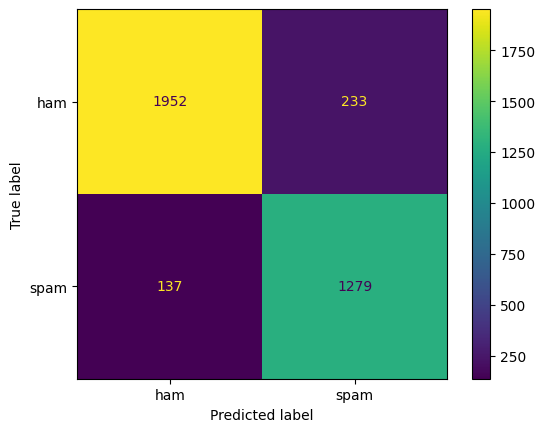

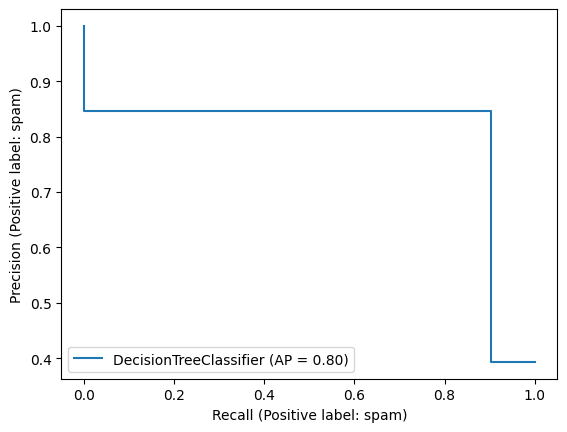

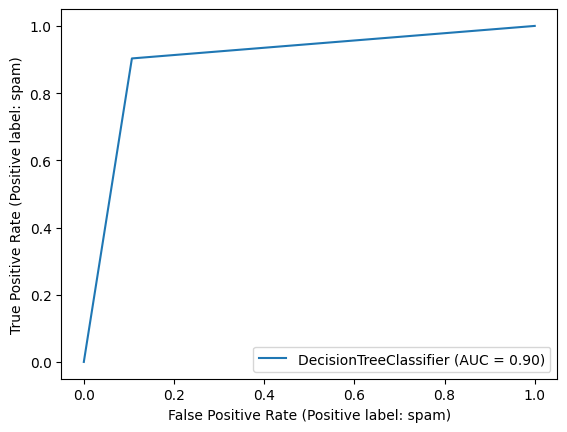

In [18]:
report(clf)

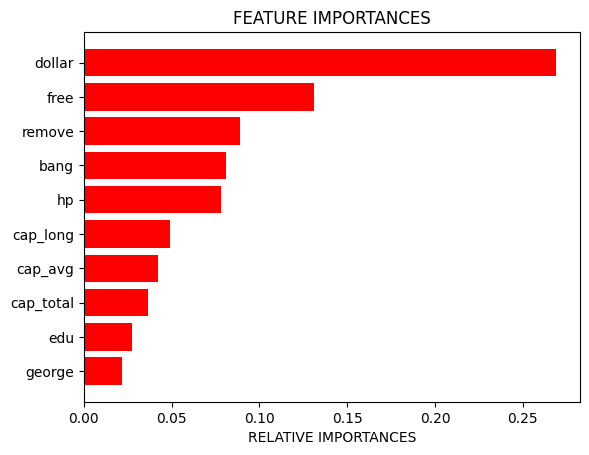

In [19]:
j = 10 
importances = clf.feature_importances_
indices = np.argsort(importances)
features = dataset.columns
plt.title('FEATURE IMPORTANCES')
plt.barh(range(j), importances[indices][len(indices)-j:], color='r', align='center')
plt.yticks(range(j), [features[i] for i in indices[len(indices)-j:]])
plt.xlabel('RELATIVE IMPORTANCES')
plt.show()

In [20]:
clf_model_2=RandomForestClassifier(n_estimators = 10)
clf_model_2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [21]:
clf_model_2.score(X_test, y_test)

0.9216884198833657

In [22]:
clf_model_3=RandomForestClassifier(n_estimators = 50)
clf_model_3.fit(X_train,y_train)
clf_model_3.score(X_test, y_test)

0.9300194390447099

In [23]:
clf_model_4=RandomForestClassifier(n_estimators = 100)
clf_model_4.fit(X_train,y_train)
clf_model_4.score(X_test, y_test)

0.9364065537350736

In [24]:
clf_model_5=RandomForestClassifier(n_estimators = 500)
clf_model_5.fit(X_train,y_train)
clf_model_5.score(X_test, y_test)

0.9336295473479589

In [25]:
clf_model_6=RandomForestClassifier(n_estimators = 1000)
clf_model_6.fit(X_train,y_train)
clf_model_6.score(X_test, y_test)

0.9350180505415162

In [26]:
clf_model_7=RandomForestClassifier(n_estimators = 5000)
clf_model_7.fit(X_train,y_train)
clf_model_7.score(X_test, y_test)

0.9350180505415162

    NOW USING RandomForestClassifier WITH ESTIMATOR 100 ONLY AND APPLYING DIFFERENT TYPES OF MAX FEATURES TO OBSERVE THE             ACCURACY ON THE CASE, WHEN WE TRY TO CHANGE THE NUMBER OF FEATURES ON EVERY SPLIT OF THE DATA  

In [27]:
clf_model_4=RandomForestClassifier(n_estimators = 100, max_features='auto')
clf_model_4.fit(X_train,y_train)
clf_model_4.score(X_test, y_test)

C:\pythonmainfiledownload\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.937239655651208

In [28]:
clf_model_4=RandomForestClassifier(n_estimators = 100, max_features='sqrt')
clf_model_4.fit(X_train,y_train)
clf_model_4.score(X_test, y_test)

0.9352957511802277

In [29]:
clf_model_4=RandomForestClassifier(n_estimators = 100, max_features='log2')
clf_model_4.fit(X_train,y_train)
clf_model_4.score(X_test, y_test)

0.9355734518189391

C:\pythonmainfiledownload\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\pythonmainfiledownload\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\pythonmainfiledownload\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class m

              precision    recall  f1-score   support

         ham       0.95      0.94      0.95      2217
        spam       0.91      0.93      0.92      1384

    accuracy                           0.94      3601
   macro avg       0.93      0.93      0.93      3601
weighted avg       0.94      0.94      0.94      3601



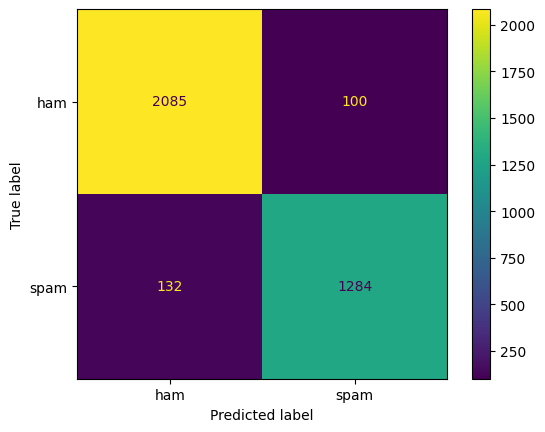

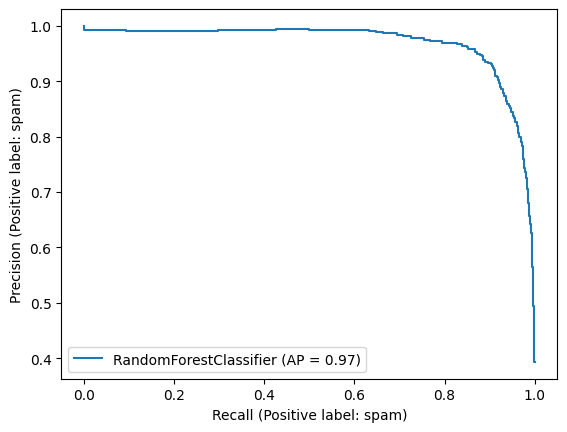

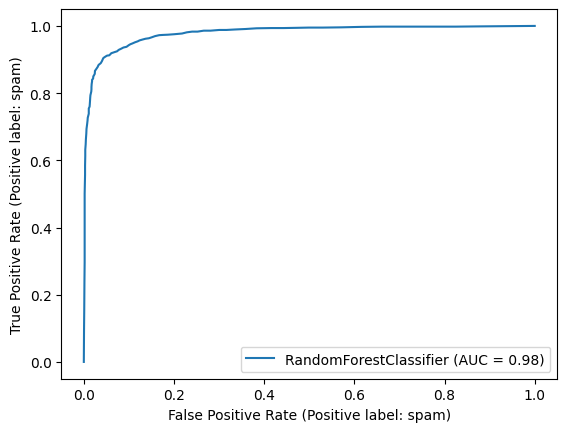

In [30]:
report(clf_model_4)

<Figure size 3500x3000 with 0 Axes>

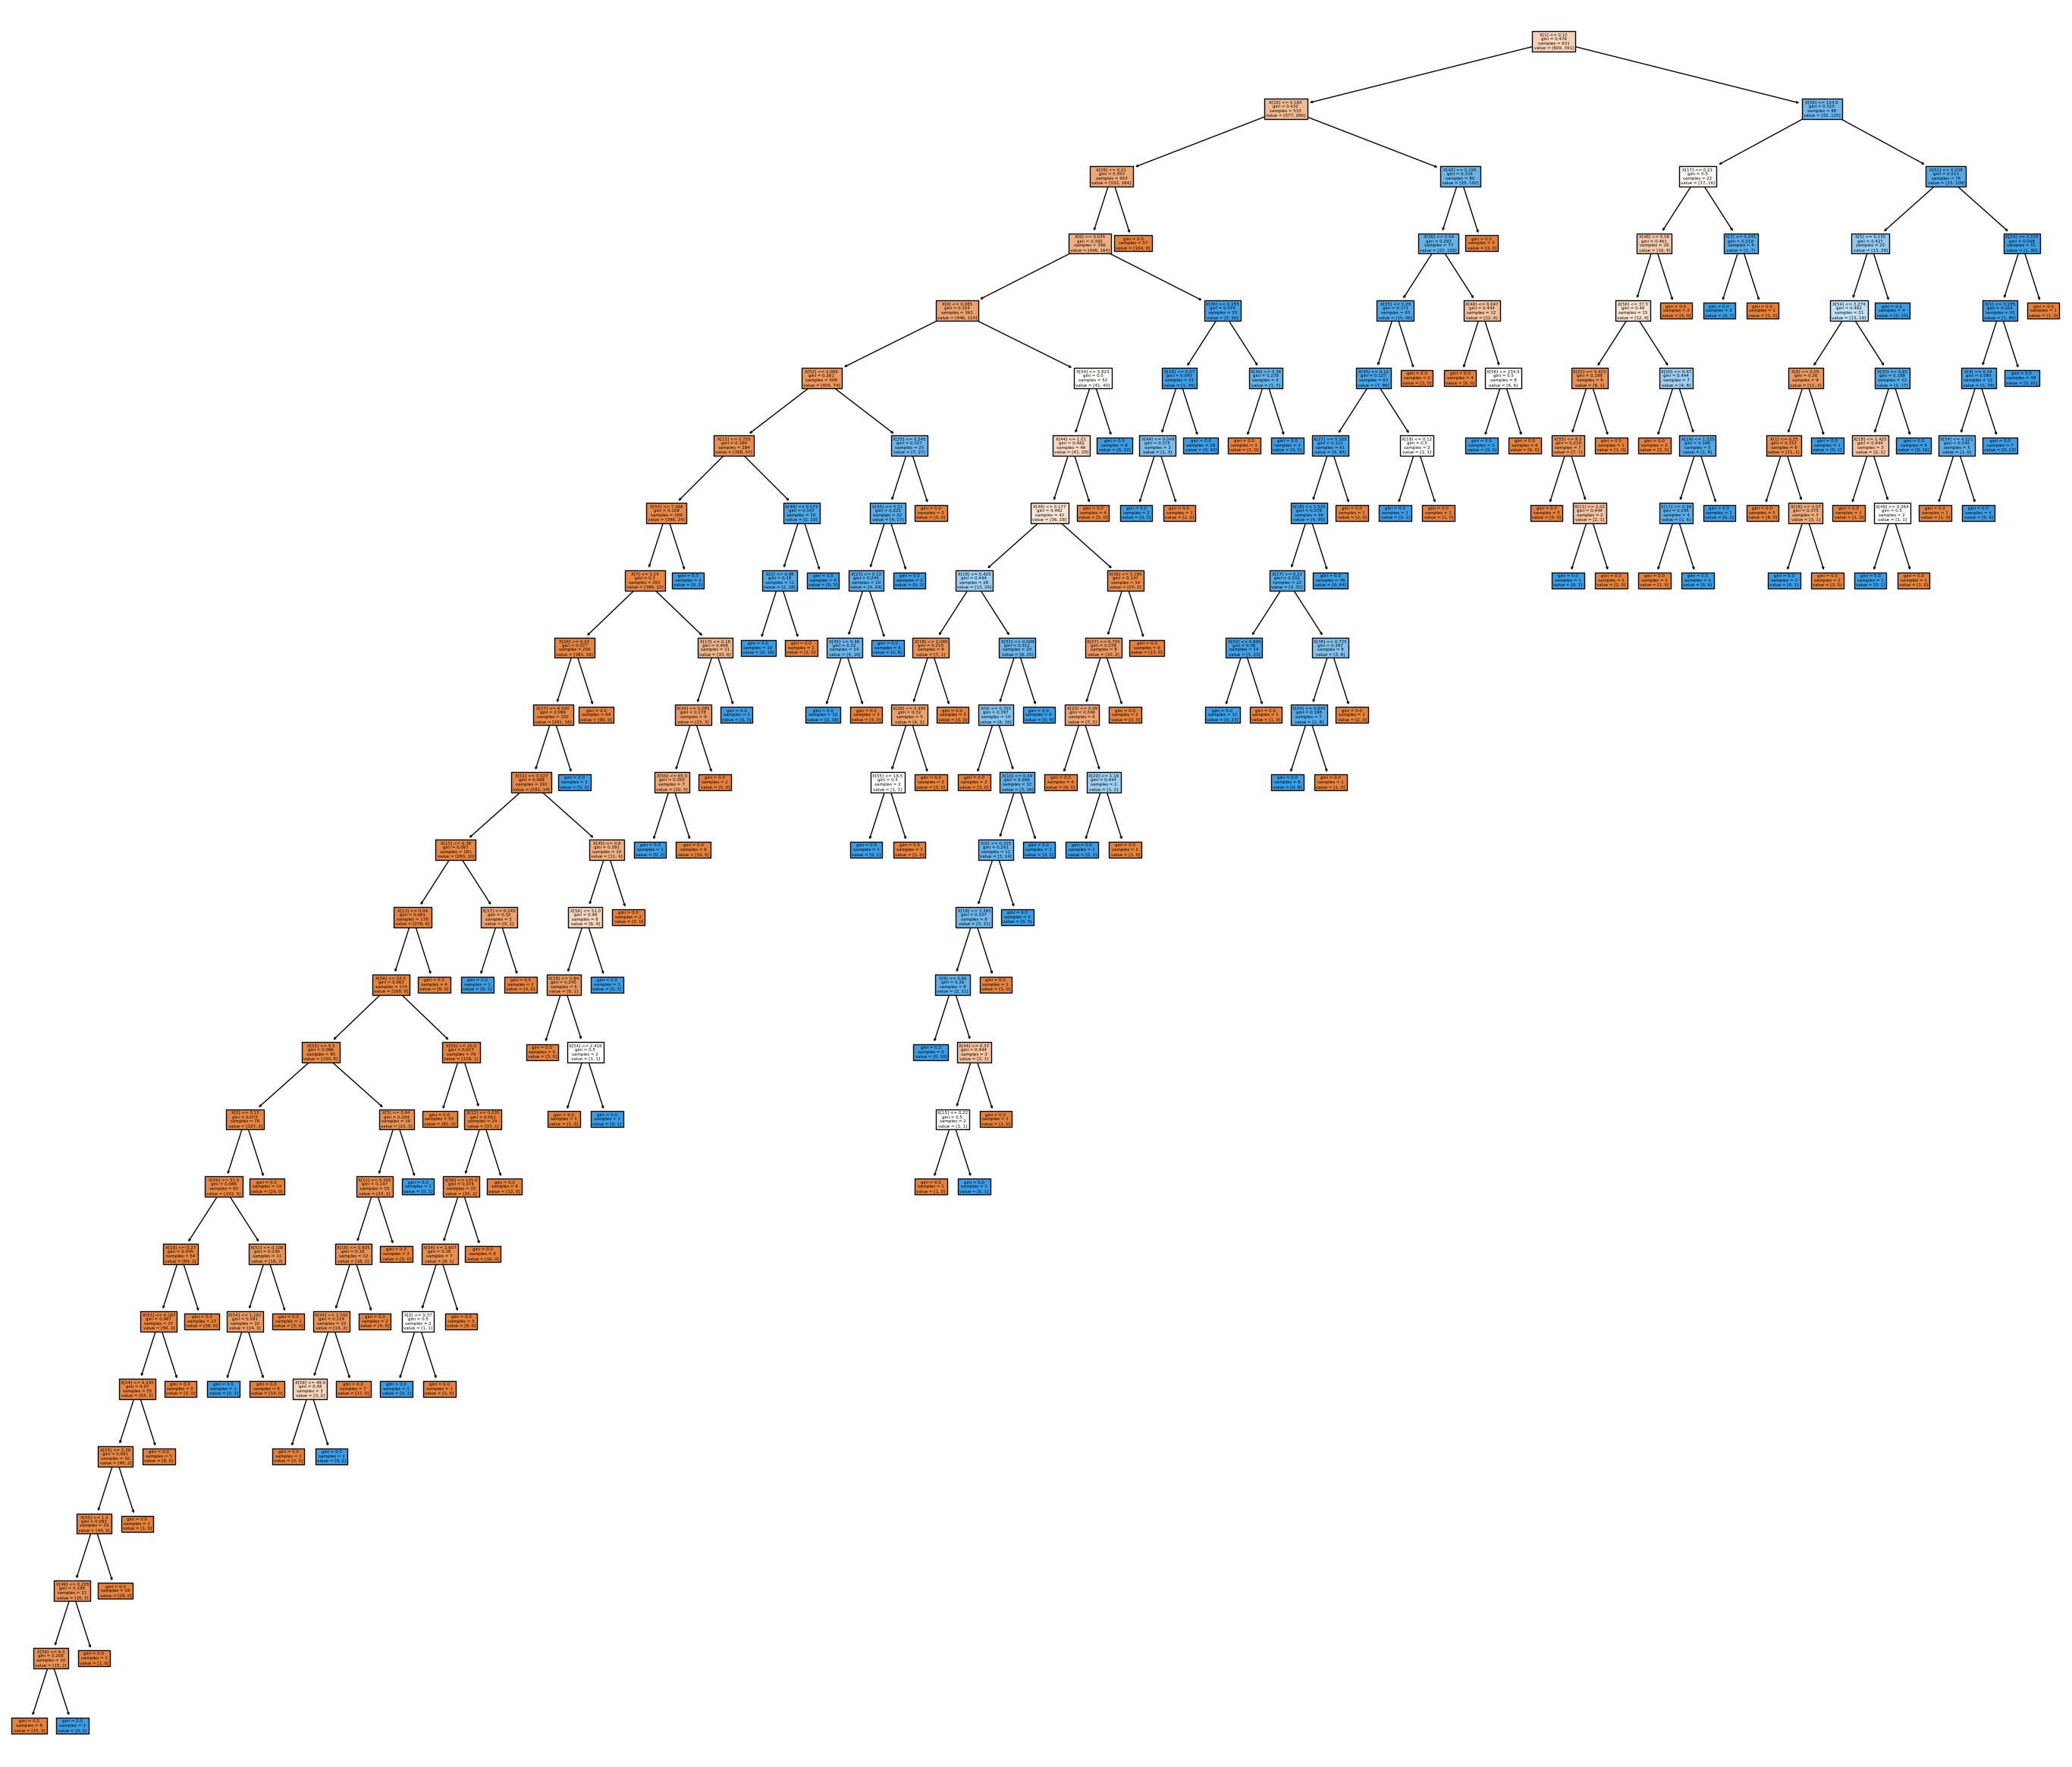

In [31]:
clf_model_4 = clf_model_4
fig = plt.figure(figsize=(35,30))
fig = plt.figure(figsize=(35,30))
plot = tree.plot_tree(clf_model_4.estimators_[10], filled=True)

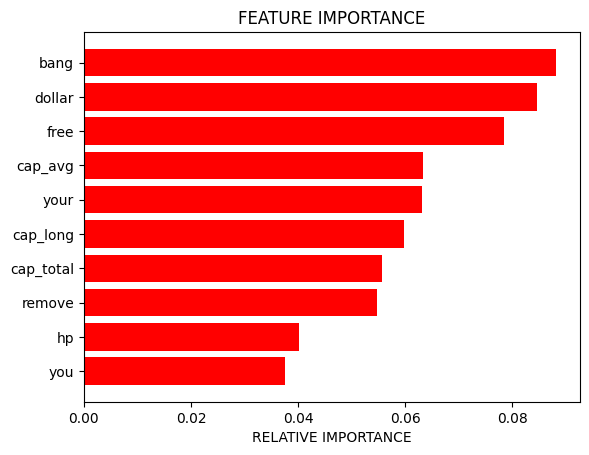

In [32]:
j = 10 
importances = clf_model_4.feature_importances_
indices = np.argsort(importances)
features = dataset.columns
plt.title('FEATURE IMPORTANCE')
plt.barh(range(j), importances[indices][len(indices)-j:], color='r', align='center')
plt.yticks(range(j), [features[i] for i in indices[len(indices)-j:]])
plt.xlabel('RELATIVE IMPORTANCE')
plt.show()

## SO ON PROPER OBSERVATION ON THE RESULTS OF BOTH THE CLASSIFIERS; RANDOMFOREST AND DECISIONTREE, WE CAN SAY THAT RANDOMFOREST SUCCESSFULLY CLASSIFIED 2085 DATA POINTS ON THE GIVEN SPAM-HAM DATASET, WHEREAS ON OTHER HAND DECISIONTREE WAS ONLY ABLE TO CLASSIFY 1952 DATA POINTS WHEN WE APPLIED THAT CLASSIFIER ON THE SAME DATASET. SO BASED ON THIS WE CAN MAKE OUR ASSUMPTION THAT "RANDOMFORESTCLASSIFIER HAS BETTER PERFORMANCE THAN THE DECISIONTREECLASSIFIER"